In [347]:
import matplotlib.pyplot as plt
import pandas as pd
import random

In [348]:
cost_of_living = pd.read_csv('data/Family_Budget_Fact_Sheet(County).csv')
cost_of_living['county_fips'] = cost_of_living['county_fips'].astype(str).apply(lambda x: x.zfill(5))
cost_of_living

,case_id,State abv.,county_fips,County,Family,Housing,Food,Transportation,Healthcare,Other Necessities,...,Healthcare.1,Other Necessities .1,Childcare.1,Taxes.1,Total.1,median_family_income,num_counties_in_st,st_cost_rank,st_med_aff_rank,st_income_rank
0,1,AL,01001,Autauga County,1p0c,817,335,1110,510,408,...,"$6,120","$4,896",$0,"$7,488","$45,636","83,790",67,8,58,7.0
1,1,AL,01001,Autauga County,1p1c,1114,494,1365,756,570,...,"$9,072","$6,840","$6,240","$9,132","$66,960","83,790",67,8,58,7.0
2,1,AL,01001,Autauga County,1p2c,1114,723,1570,1003,651,...,"$12,036","$7,812","$12,144","$11,388","$84,252","83,790",67,8,58,7.0
3,1,AL,01001,Autauga County,1p3c,1416,966,1670,1249,843,...,"$14,988","$10,116","$13,956","$14,808","$102,492","83,790",67,8,58,7.0
4,1,AL,01001,Autauga County,1p4c,1416,1182,1742,1495,920,...,"$17,940","$11,040","$13,956","$17,688","$112,704","83,790",67,8,58,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31425,3143,WY,56045,Weston County,2p0c,741,637,1613,1304,488,...,"$15,648","$5,856",$0,"$8,028","$65,412","80,178",23,4,2,18.0
31426,3143,WY,56045,Weston County,2p1c,975,793,1791,1698,626,...,"$20,376","$7,512","$6,708","$9,576","$86,880","80,178",23,4,2,18.0
31427,3143,WY,56045,Weston County,2p2c,975,1003,1911,2091,700,...,"$25,092","$8,400","$13,152","$10,548","$103,872","80,178",23,4,2,18.0
31428,3143,WY,56045,Weston County,2p3c,1187,1225,2074,2485,854,...,"$29,820","$10,248","$15,132","$12,756","$121,812","80,178",23,4,2,18.0


In [349]:
population = pd.read_csv('data/counties.csv')
population

,County,State,FIPS Code,Population,Area,Density
0,Autauga County,Alabama,01001,59095,594,99
1,Baldwin County,Alabama,01003,239294,1589,151
2,Barbour County,Alabama,01005,24964,884,28
3,Bibb County,Alabama,01007,22477,622,36
4,Blount County,Alabama,01009,59041,644,92
...,...,...,...,...,...,...
3089,Sweetwater County,Wyoming,56037,41614,10426,4
3090,Teton County,Wyoming,56039,23575,4008,6
3091,Uinta County,Wyoming,56041,20635,2082,10
3092,Washakie County,Wyoming,56043,7705,2240,3


In [350]:
df = pd.read_csv('data/asecpub23csv/hhpub23.csv', usecols=['HTOTVAL', 'H_NUMPER', 'GTCO', 'GESTFIPS', 'HSUP_WGT', 'HUNDER18'])

# remove all rows with missing data
df = df[(df['GTCO'] != 0) & (df['GESTFIPS'] != 0) & (df['HTOTVAL'] != 0)]
df['Family Type'] = [f"{min(row['H_NUMPER'] - row['HUNDER18'], 2)}p{min(row['HUNDER18'], 4)}c" for index, row in df.iterrows()]
df = df.drop(columns=['HUNDER18'])

df

,GESTFIPS,H_NUMPER,HSUP_WGT,HTOTVAL,GTCO,Family Type
50,23,6,60721,177585,11,2p1c
284,23,2,249073,39576,11,2p0c
285,23,2,119153,126961,11,2p0c
289,23,2,52787,128161,11,2p0c
290,23,1,149570,804,11,1p0c
...,...,...,...,...,...,...
88973,15,4,36445,96000,3,2p1c
88974,15,2,68296,173540,3,2p0c
88975,15,6,44578,211102,3,2p2c
88976,15,5,41320,90415,3,2p2c


In [351]:
N = 20000
sample_df = df.sample(n=N, weights=df['HSUP_WGT'])
sample_df

,GESTFIPS,H_NUMPER,HSUP_WGT,HTOTVAL,GTCO,Family Type
10937,34,2,364143,110040,17,2p0c
6050,9,3,302672,155206,1,2p0c
8920,36,3,320464,402083,61,2p1c
4842,25,1,260932,89605,15,1p0c
7183,36,2,501937,125012,91,2p0c
...,...,...,...,...,...,...
45192,12,2,190409,81461,11,2p0c
57876,22,1,104022,22225,73,1p0c
9346,36,5,311734,69151,81,2p2c
17100,18,2,164192,350000,39,2p0c


In [352]:
# import random

# # 'calculate' time
# sample_df['Free Time'] = [ 1 + random.normalvariate(0,0.2) for _ in range(N)]

# calculating FIPS codes

sample_df['GESTFIPS'] = sample_df['GESTFIPS'].astype(str).apply(lambda x: x.zfill(2))
sample_df['GTCO'] = sample_df['GTCO'].astype(str).apply(lambda x: x.zfill(3))
sample_df['Code'] = sample_df['GESTFIPS'] + sample_df['GTCO']

sample_df = sample_df.drop(columns=['GESTFIPS', 'GTCO'])

# renaming cost of income
sample_df = sample_df.rename(columns={'HTOTVAL': 'Income'})

sample_df


,H_NUMPER,HSUP_WGT,Income,Family Type,Code
10937,2,364143,110040,2p0c,34017
6050,3,302672,155206,2p0c,09001
8920,3,320464,402083,2p1c,36061
4842,1,260932,89605,1p0c,25015
7183,2,501937,125012,2p0c,36091
...,...,...,...,...,...
45192,2,190409,81461,2p0c,12011
57876,1,104022,22225,1p0c,22073
9346,5,311734,69151,2p2c,36081
17100,2,164192,350000,2p0c,18039


In [353]:
# adding population density
sample_df = pd.merge(sample_df, population, left_on='Code', right_on='FIPS Code')
sample_df = sample_df.drop(columns=['FIPS Code'])

sample_df

,H_NUMPER,HSUP_WGT,Income,Family Type,Code,County,State,Population,Area,Density
0,2,364143,110040,2p0c,34017,Hudson County,New Jersey,702463,47,14946
1,1,306359,117010,1p0c,34017,Hudson County,New Jersey,702463,47,14946
2,1,546024,129752,1p0c,34017,Hudson County,New Jersey,702463,47,14946
3,1,353310,1002302,1p0c,34017,Hudson County,New Jersey,702463,47,14946
4,3,212118,23600,2p0c,34017,Hudson County,New Jersey,702463,47,14946
...,...,...,...,...,...,...,...,...,...,...
19558,1,297266,50046,1p0c,13015,Bartow County,Georgia,110843,460,241
19559,2,383298,37681,2p0c,13015,Bartow County,Georgia,110843,460,241
19560,2,471590,55125,2p0c,13015,Bartow County,Georgia,110843,460,241
19561,3,252527,291553,2p1c,13015,Bartow County,Georgia,110843,460,241


In [354]:
# adding cost of living

cost_of_living['Family'] = cost_of_living['Family'].astype(str)
sample_df['Family Type'] = sample_df['Family Type'].astype(str)

sample_df = pd.merge(sample_df, cost_of_living[['county_fips', 'Family', 'Total.1']], 
                     left_on=['Code', 'Family Type'], 
                     right_on=['county_fips', 'Family'])

sample_df = sample_df.drop(columns=['county_fips'])

sample_df['Cost of Living'] = [int(row['Total.1'].strip("$").replace(',', '_')) for index, row in sample_df.iterrows() ]

sample_df


,H_NUMPER,HSUP_WGT,Income,Family Type,Code,County,State,Population,Area,Density,Family,Total.1,Cost of Living
0,2,364143,110040,2p0c,34017,Hudson County,New Jersey,702463,47,14946,2p0c,"$71,664",71664
1,3,212118,23600,2p0c,34017,Hudson County,New Jersey,702463,47,14946,2p0c,"$71,664",71664
2,2,221255,178322,2p0c,34017,Hudson County,New Jersey,702463,47,14946,2p0c,"$71,664",71664
3,2,473614,42000,2p0c,34017,Hudson County,New Jersey,702463,47,14946,2p0c,"$71,664",71664
4,2,231177,107000,2p0c,34017,Hudson County,New Jersey,702463,47,14946,2p0c,"$71,664",71664
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19557,2,521726,50000,2p0c,13015,Bartow County,Georgia,110843,460,241,2p0c,"$63,804",63804
19558,2,383298,37681,2p0c,13015,Bartow County,Georgia,110843,460,241,2p0c,"$63,804",63804
19559,2,471590,55125,2p0c,13015,Bartow County,Georgia,110843,460,241,2p0c,"$63,804",63804
19560,1,297266,50046,1p0c,13015,Bartow County,Georgia,110843,460,241,1p0c,"$48,744",48744


In [355]:
land_area = pd.read_csv("data/RDC_Inventory_Core_Metrics_County_History.csv")
# land_area.sort_values('county_fips')
land_area = land_area[(land_area['month_date_yyyymm']) > 2020_00]
land_area['county_fips'] = land_area['county_fips'].astype(str).apply(lambda x: x.zfill(5))
land_area = land_area[['median_square_feet', 'county_fips']]

land_area

,median_square_feet,county_fips
0,1623.0,37199
1,1969.0,42077
2,1782.0,36011
3,2771.0,31093
4,1830.0,48147
...,...,...
155238,1722.0,47131
155239,1768.0,20165
155240,1849.0,30099
155241,1819.0,18131


In [356]:
county_land_area = {}
state_land_area = {}

for index, row in land_area.iterrows():
    code = row['county_fips']
    state = code[:3]

    if code not in county_land_area:
        county_land_area[code] = [index]
    else:
        county_land_area[code].append(index)

    if state not in state_land_area:
        state_land_area[state] = [index]
    else:
        state_land_area[state].append(index)

In [357]:

def select_random_row(county_code):
    if county_code in county_land_area:
        index = random.choice(county_land_area[county_code])
        return land_area.iloc[index]

    state = county_code[:3]
    index = random.choice(state_land_area[state])
    return land_area.iloc[index]

houses = sample_df['Code'].apply(select_random_row)

In [358]:
sample_df = pd.concat([sample_df.reset_index(), houses[['median_square_feet']]], axis=1)
sample_df

,index,H_NUMPER,HSUP_WGT,Income,Family Type,Code,County,State,Population,Area,Density,Family,Total.1,Cost of Living,median_square_feet
0,0,2,364143,110040,2p0c,34017,Hudson County,New Jersey,702463,47,14946,2p0c,"$71,664",71664,1157.0
1,1,3,212118,23600,2p0c,34017,Hudson County,New Jersey,702463,47,14946,2p0c,"$71,664",71664,1040.0
2,2,2,221255,178322,2p0c,34017,Hudson County,New Jersey,702463,47,14946,2p0c,"$71,664",71664,1172.0
3,3,2,473614,42000,2p0c,34017,Hudson County,New Jersey,702463,47,14946,2p0c,"$71,664",71664,1014.0
4,4,2,231177,107000,2p0c,34017,Hudson County,New Jersey,702463,47,14946,2p0c,"$71,664",71664,1160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19557,19557,2,521726,50000,2p0c,13015,Bartow County,Georgia,110843,460,241,2p0c,"$63,804",63804,2184.0
19558,19558,2,383298,37681,2p0c,13015,Bartow County,Georgia,110843,460,241,2p0c,"$63,804",63804,2071.0
19559,19559,2,471590,55125,2p0c,13015,Bartow County,Georgia,110843,460,241,2p0c,"$63,804",63804,2105.0
19560,19560,1,297266,50046,1p0c,13015,Bartow County,Georgia,110843,460,241,1p0c,"$48,744",48744,1943.0


In [359]:
# clean up
sample_df = sample_df.rename(columns={"H_NUMPER": "Number of People", "median_square_feet": "Floor Area"})
sample_df['Floor Area'] = sample_df['Floor Area'] * 0.09290304
sample_df['Density'] = sample_df['Density'] * 0.3861274922774502
sample_df

,index,Number of People,HSUP_WGT,Income,Family Type,Code,County,State,Population,Area,Density,Family,Total.1,Cost of Living,Floor Area
0,0,2,364143,110040,2p0c,34017,Hudson County,New Jersey,702463,47,5771.061500,2p0c,"$71,664",71664,107.488817
1,1,3,212118,23600,2p0c,34017,Hudson County,New Jersey,702463,47,5771.061500,2p0c,"$71,664",71664,96.619162
2,2,2,221255,178322,2p0c,34017,Hudson County,New Jersey,702463,47,5771.061500,2p0c,"$71,664",71664,108.882363
3,3,2,473614,42000,2p0c,34017,Hudson County,New Jersey,702463,47,5771.061500,2p0c,"$71,664",71664,94.203683
4,4,2,231177,107000,2p0c,34017,Hudson County,New Jersey,702463,47,5771.061500,2p0c,"$71,664",71664,107.767526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19557,19557,2,521726,50000,2p0c,13015,Bartow County,Georgia,110843,460,93.056726,2p0c,"$63,804",63804,202.900239
19558,19558,2,383298,37681,2p0c,13015,Bartow County,Georgia,110843,460,93.056726,2p0c,"$63,804",63804,192.402196
19559,19559,2,471590,55125,2p0c,13015,Bartow County,Georgia,110843,460,93.056726,2p0c,"$63,804",63804,195.560899
19560,19560,1,297266,50046,1p0c,13015,Bartow County,Georgia,110843,460,93.056726,1p0c,"$48,744",48744,180.510607


In [360]:
import random

# 'calculate' time
sample_df['Free Time'] = [ -0.0005*row['Density'] + 9 + random.normalvariate(0,0.2) for index, row in sample_df.iterrows()]

In [361]:
from modelcat import get_HPFI, get_income_index, get_space_index, get_time_index

(array([ 253.,  483.,  491.,  475.,  589.,  767.,  853.,  975., 1067.,
        1145., 1103., 1043., 1064., 1045., 1123., 1187., 1275., 1547.,
        1848., 1229.]),
 array([0.00697067, 0.05655783, 0.10614499, 0.15573214, 0.2053193 ,
        0.25490645, 0.30449361, 0.35408077, 0.40366792, 0.45325508,
        0.50284223, 0.55242939, 0.60201655, 0.6516037 , 0.70119086,
        0.75077801, 0.80036517, 0.84995232, 0.89953948, 0.94912664,
        0.99871379]),
 <BarContainer object of 20 artists>)

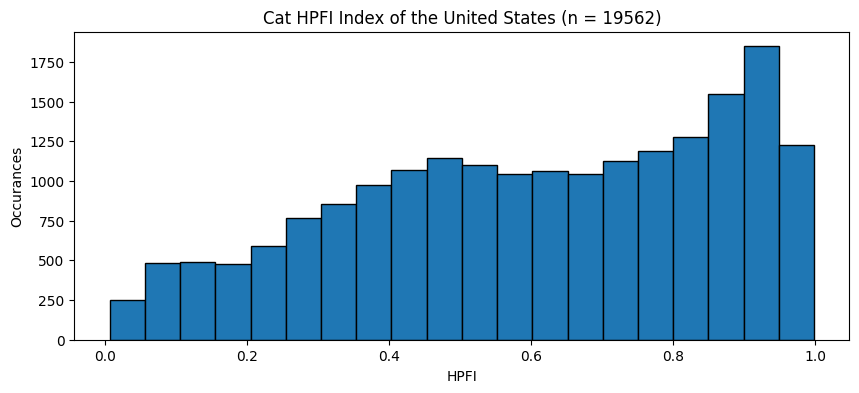

In [362]:
sample_HPFI = []
sample_II   = []
sample_SI   = []
sample_TI   = []

for index, row in sample_df.iterrows():
    number_of_people    = row['Number of People']
    income              = row['Income']
    free_time           = row['Free Time']
    density             = row['Density']
    cost_of_living     = row['Cost of Living']
    floor_area          = row['Floor Area']

    HPFI    = get_HPFI(density, cost_of_living, income, number_of_people, free_time, floor_area, 100000/(density+1))
    II      = get_income_index(income, cost_of_living)
    SI      = get_space_index(density, number_of_people, floor_area, 0)
    TI      = get_time_index(free_time)

    sample_HPFI.append(HPFI)
    sample_II.append(II)
    sample_SI.append(SI)
    sample_TI.append(TI)

# sample_HPFI
plt.figure(figsize=(10, 4))
plt.title(f'Cat HPFI Index of the United States (n = {len(sample_HPFI)})')
plt.xlabel('HPFI')
plt.ylabel('Occurances')
plt.hist(sample_HPFI, bins=20, edgecolor="black")


In [363]:
sample_df['HPFI'] = sample_HPFI
sample_df['Income Index'] = sample_II
sample_df['Space Index'] = sample_SI
sample_df['Time Index'] = sample_TI

sample_df


,index,Number of People,HSUP_WGT,Income,Family Type,Code,County,State,Population,Area,Density,Family,Total.1,Cost of Living,Floor Area,Free Time,HPFI,Income Index,Space Index,Time Index
0,0,2,364143,110040,2p0c,34017,Hudson County,New Jersey,702463,47,5771.061500,2p0c,"$71,664",71664,107.488817,5.978436,0.899773,0.749164,0.981521,0.976661
1,1,3,212118,23600,2p0c,34017,Hudson County,New Jersey,702463,47,5771.061500,2p0c,"$71,664",71664,96.619162,5.972607,0.324240,0.038131,0.718394,0.976500
2,2,2,221255,178322,2p0c,34017,Hudson County,New Jersey,702463,47,5771.061500,2p0c,"$71,664",71664,108.882363,6.222885,0.989226,0.989102,0.983180,0.982633
3,3,2,473614,42000,2p0c,34017,Hudson County,New Jersey,702463,47,5771.061500,2p0c,"$71,664",71664,94.203683,5.886964,0.443381,0.090476,0.955213,0.974021
4,4,2,231177,107000,2p0c,34017,Hudson County,New Jersey,702463,47,5771.061500,2p0c,"$71,664",71664,107.767526,5.911255,0.887196,0.719536,0.981865,0.974745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19557,19557,2,521726,50000,2p0c,13015,Bartow County,Georgia,110843,460,93.056726,2p0c,"$63,804",63804,202.900239,8.607519,0.555888,0.192128,0.738073,0.999523
19558,19558,2,383298,37681,2p0c,13015,Bartow County,Georgia,110843,460,93.056726,2p0c,"$63,804",63804,192.402196,9.089501,0.462774,0.113831,0.691420,0.999804
19559,19559,2,471590,55125,2p0c,13015,Bartow County,Georgia,110843,460,93.056726,2p0c,"$63,804",63804,195.560899,9.173458,0.591009,0.235054,0.705937,0.999833
19560,19560,1,297266,50046,1p0c,13015,Bartow County,Georgia,110843,460,93.056726,1p0c,"$48,744",48744,180.510607,8.820067,0.697162,0.370438,0.781584,0.999675


In [364]:
len(sample_df[sample_df['HPFI'] > 0.5]) / len(sample_df)

0.6399141192107146

In [365]:
sample_df.describe()

,index,Number of People,HSUP_WGT,Income,Population,Area,Density,Cost of Living,Floor Area,Free Time,HPFI,Income Index,Space Index,Time Index
count,19562.000000,19562.000000,1.956200e+04,1.956200e+04,1.956200e+04,19562.000000,19562.000000,19562.000000,19562.000000,19562.000000,19562.000000,19562.000000,19562.000000,19562.000000
mean,9780.500000,2.560986,2.785607e+05,1.159043e+05,1.483833e+06,1640.995962,781.446426,77329.028116,169.406979,8.609908,0.603566,0.478124,0.538063,0.991054
std,5647.207319,1.471119,1.239623e+05,1.345656e+05,2.383769e+06,2166.389378,2501.791165,29317.043577,32.971387,1.265337,0.261271,0.381891,0.265279,0.089416
min,0.000000,1.000000,2.809900e+04,-9.998000e+03,1.690000e+02,26.000000,0.000000,36864.000000,82.869512,-4.940073,0.006971,0.000013,0.000003,0.000260
25%,4890.250000,1.000000,1.983030e+05,4.006625e+04,2.422530e+05,469.000000,111.976973,56124.000000,153.011307,8.583578,0.403805,0.100700,0.325826,0.999502
50%,9780.500000,2.000000,2.578575e+05,8.007950e+04,6.132190e+05,764.000000,301.951699,68976.000000,169.826757,8.796591,0.627048,0.396201,0.580159,0.999661
75%,14670.750000,3.000000,3.634082e+05,1.452395e+05,1.497987e+06,1581.000000,682.287279,90840.000000,187.106723,8.976052,0.839982,0.914283,0.751895,0.999757
max,19561.000000,15.000000,1.072820e+06,2.550898e+06,9.829544e+06,9224.000000,26557.076664,243300.000000,297.754243,9.768472,0.998714,1.000000,1.000000,0.999949


In [366]:
sample_rural = sample_df[sample_df['Density'] <= 100]
sample_suburban = sample_df[(sample_df['Density'] <= 5_000) & (sample_df['Density'] > 100)]
sample_urban = sample_df[sample_df['Density'] >= 5_000]

In [367]:
sample_rural.describe()
sample_rural

,index,Number of People,HSUP_WGT,Income,Population,Area,Density,Cost of Living,Floor Area,Free Time,HPFI,Income Index,Space Index,Time Index
count,4000.000000,4000.000000,4000.000000,4.000000e+03,4.000000e+03,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,12206.650500,2.590500,275177.073250,1.012447e+05,2.252214e+05,2109.172500,47.882608,75705.432000,173.646349,8.979724,0.607054,0.455556,0.503110,0.999742
std,5306.795624,1.486224,133131.786946,1.027628e+05,2.488248e+05,2201.734611,31.629758,30195.696137,31.326856,0.202289,0.254648,0.371402,0.238225,0.000099
min,493.000000,1.000000,28099.000000,-9.998000e+03,1.690000e+02,102.000000,0.000000,37656.000000,87.793373,8.282557,0.016685,0.000015,0.000877,0.999159
25%,8914.750000,2.000000,191931.250000,3.892925e+04,1.110340e+05,718.000000,25.484414,54312.000000,157.284847,8.841381,0.415143,0.098415,0.310444,0.999688
50%,13548.500000,2.000000,256995.000000,7.500000e+04,1.671460e+05,1196.000000,44.018534,65928.000000,174.843521,8.981078,0.623463,0.362806,0.538890,0.999759
75%,16730.250000,3.000000,375559.000000,1.307265e+05,2.475270e+05,2738.000000,78.383881,88224.000000,192.030584,9.115014,0.837780,0.860343,0.696187,0.999813
max,19561.000000,12.000000,779051.000000,1.271001e+06,1.052030e+06,9189.000000,99.234766,202416.000000,281.589114,9.732492,0.991325,1.000000,0.945184,0.999945


In [368]:
sample_suburban.describe()
sample_suburban

,index,Number of People,HSUP_WGT,Income,Population,Area,Density,Cost of Living,Floor Area,Free Time,HPFI,Income Index,Space Index,Time Index
count,15038.000000,15038.000000,1.503800e+04,1.503800e+04,1.503800e+04,15038.000000,15038.000000,15038.000000,15038.000000,15038.000000,15038.000000,15038.000000,15038.000000,15038.000000
mean,9274.504854,2.566631,2.792776e+05,1.184828e+05,1.827651e+06,1572.044487,582.186718,77406.134060,169.519864,8.708247,0.608390,0.483553,0.534492,0.999477
std,5567.485493,1.470934,1.222128e+05,1.387881e+05,2.610946e+06,2159.703265,582.641726,29075.208581,32.817505,0.351535,0.257313,0.383121,0.263561,0.000830
min,89.000000,1.000000,2.963400e+04,-9.593000e+03,2.481100e+04,26.000000,101.165403,36864.000000,82.869512,6.292743,0.008190,0.000013,0.000003,0.984078
25%,4290.250000,1.000000,1.991995e+05,4.072200e+04,4.291910e+05,461.000000,197.311149,56244.000000,153.104210,8.551796,0.409984,0.102915,0.324314,0.999473
50%,9202.500000,2.000000,2.576300e+05,8.151550e+04,8.397840e+05,696.000000,495.401573,68976.000000,169.362242,8.751280,0.632617,0.405297,0.580068,0.999632
75%,13849.750000,3.000000,3.615332e+05,1.495275e+05,1.774816e+06,1399.000000,757.968267,90888.000000,186.270595,8.924433,0.840799,0.924207,0.752057,0.999732
max,19554.000000,15.000000,1.072820e+06,2.550898e+06,9.829544e+06,9224.000000,4256.283347,243300.000000,297.754243,9.768472,0.998714,1.000000,0.998677,0.999949


In [369]:
sample_urban.describe()
sample_urban

,index,Number of People,HSUP_WGT,Income,Population,Area,Density,Cost of Living,Floor Area,Free Time,HPFI,Income Index,Space Index,Time Index
count,524.000000,524.000000,524.000000,5.240000e+02,5.240000e+02,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000
mean,5781.555344,2.173664,283814.933206,1.538089e+05,1.224508e+06,45.931298,12099.619620,87510.068702,133.805731,2.964723,0.438483,0.494582,0.907354,0.682990
std,4222.271534,1.299505,98246.714163,1.985673e+05,6.883888e+05,9.712849,9524.887371,27290.437427,27.985129,4.771132,0.354385,0.418046,0.233631,0.448675
min,0.000000,1.000000,120603.000000,7.000000e+00,7.024630e+05,33.000000,5134.337265,60216.000000,94.203683,-4.940073,0.006971,0.000069,0.000529,0.000260
25%,2560.750000,1.000000,207573.000000,4.169125e+04,7.712450e+05,33.000000,5240.908453,67452.000000,112.041066,-4.070963,0.096298,0.051143,0.978854,0.001201
50%,8016.500000,2.000000,264543.500000,9.497250e+04,8.152010e+05,47.000000,6697.381354,79824.000000,122.910722,5.806380,0.324523,0.446907,0.998717,0.971492
75%,8260.250000,3.000000,351801.750000,1.871402e+05,2.269675e+06,58.000000,26557.076664,91308.000000,155.148077,6.294837,0.819070,0.988153,1.000000,0.984120
max,19212.000000,9.000000,627001.000000,2.200009e+06,2.269675e+06,61.000000,26557.076664,205152.000000,204.665397,6.898889,0.995017,1.000000,1.000000,0.992846
